----
Homework no: 5
===

### Name : Goki Folder Rudianto Purba | Student ID : 1101208510   

---
#### (x) My refrence 
#### (v) I totally write by myself
#### Author |  ***[Goki Purba GitHub](https://github.com/gokipurba "Purba's GitHub")***

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import math
df = pd.read_csv("1.csv", index_col= None)
df.columns = ["No", "x", "y", "z", "Label"]
df.head()

No     x     y     z  Label
0  1.0  1667  2072  2047      1
1  2.0  1611  1957  1906      1
2  3.0  1601  1939  1831      1
3  4.0  1643  1965  1879      1
4  5.0  1604  1959  1921      1

In [2]:
new_row = pd.DataFrame({"No": 0, "x": 1502, "y":2215, "z": 2153, "Label": 1},index=[0])
df = pd.concat([new_row,df]).reset_index(drop=True)
df = df.loc[df["Label"] >0]
df["m"] = df["x"]**2 + df["y"]**2 + df["z"]**2
df['m'] = [math.sqrt(number) for number in df['m']]
df

No     x     y     z  Label            m
0            0.0  1502  2215  2153      1  3434.768988
1            1.0  1667  2072  2047      1  3355.932359
2            2.0  1611  1957  1906      1  3171.435952
3            3.0  1601  1939  1831      1  3110.543843
4            4.0  1643  1965  1879      1  3176.683018
...          ...   ...   ...   ...    ...          ...
162495  162500.0  1926  2382  2072      7  3698.186583
162496  162500.0  1927  2388  2074      7  3703.693967
162497  162500.0  1930  2383  2074      7  3702.035251
162498  162500.0  1929  2385  2076      7  3703.922515
162499  162500.0  1926  2385  2078      7  3703.482820

[162500 rows x 6 columns]

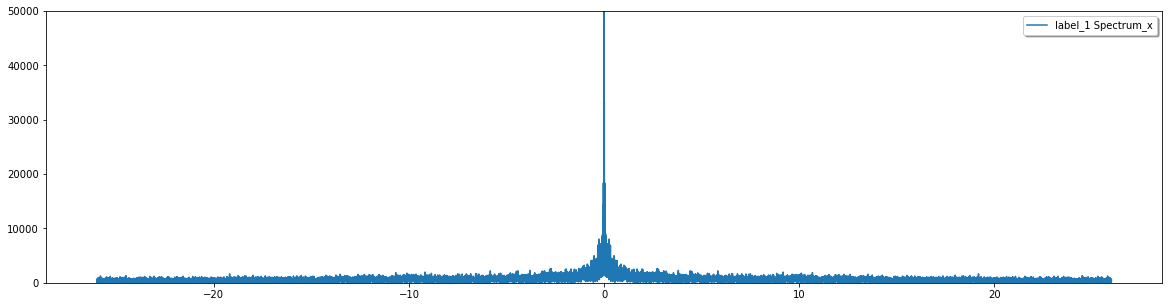

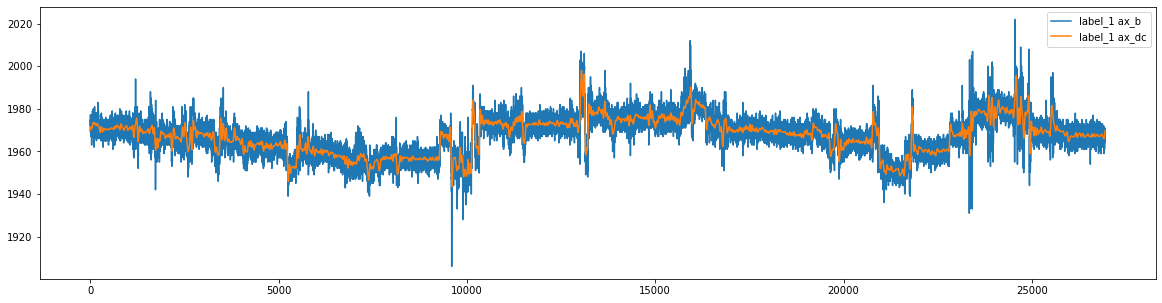

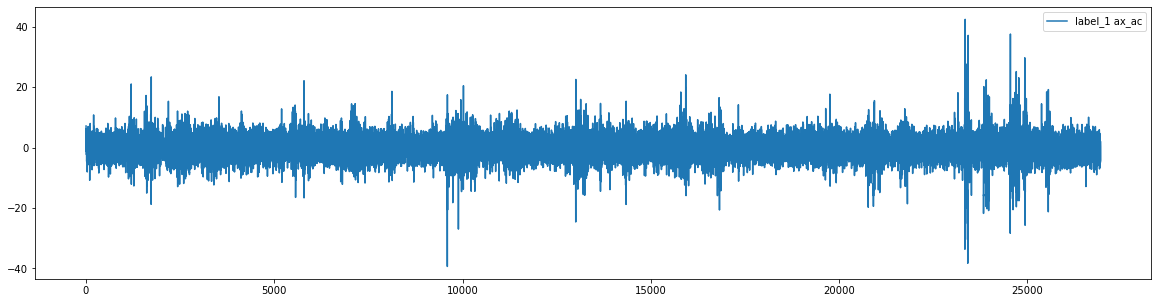

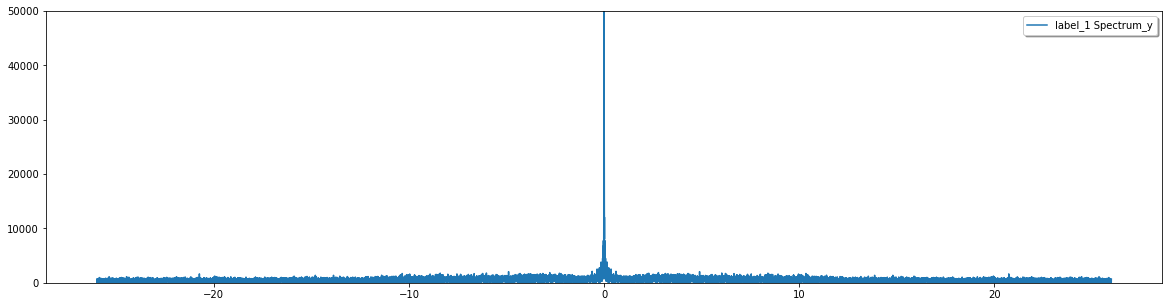

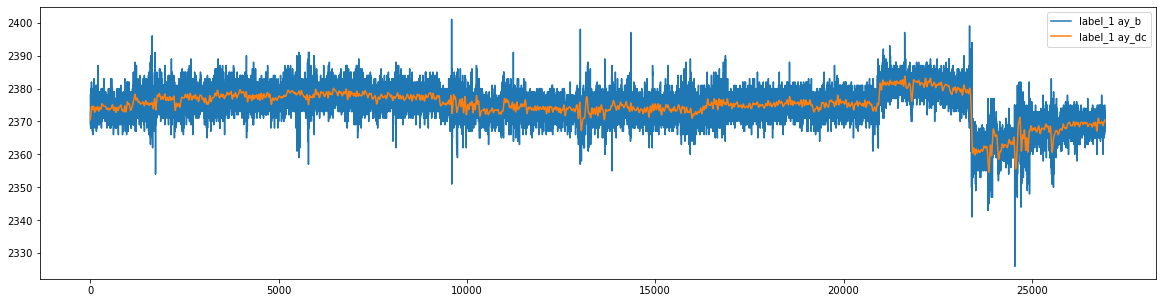

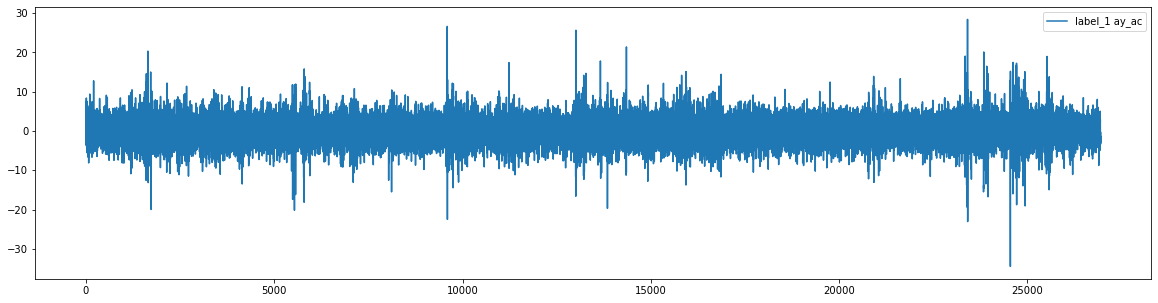

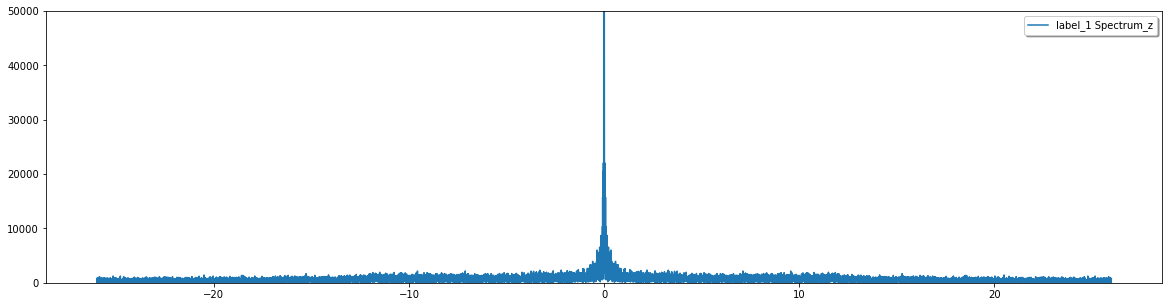

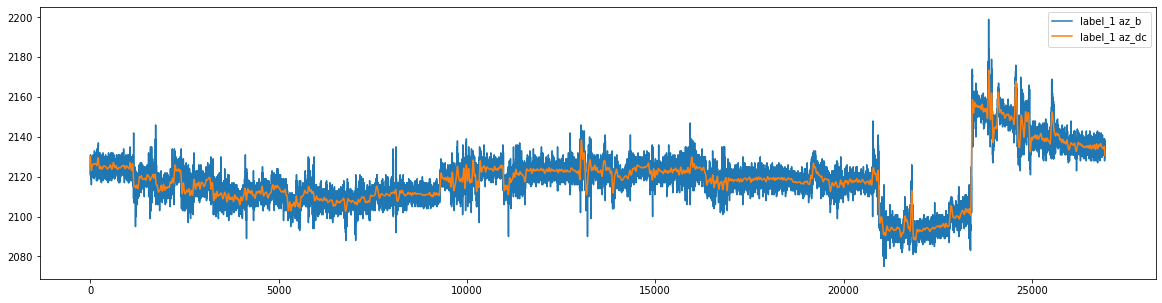

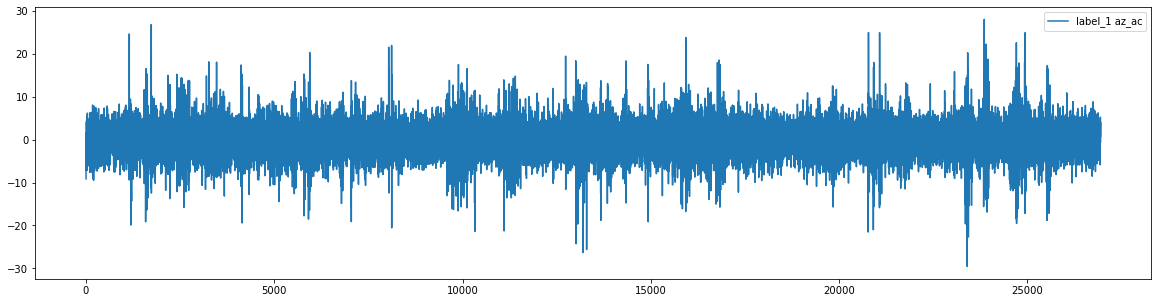

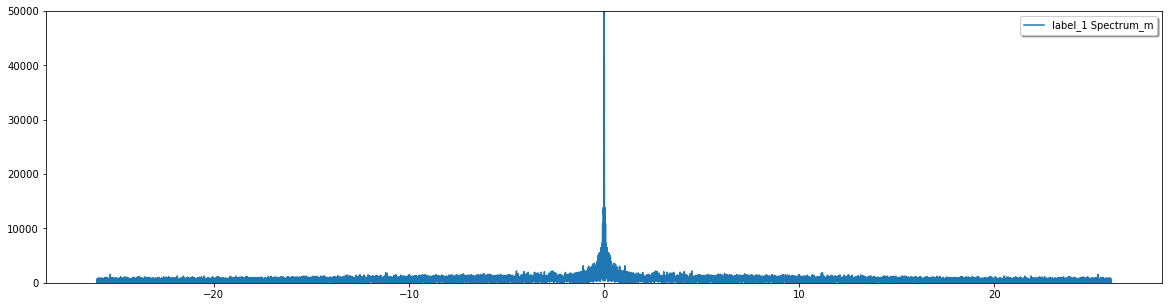

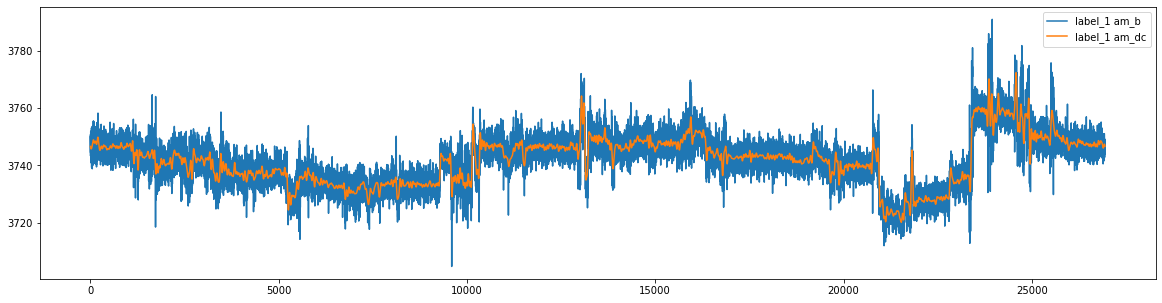

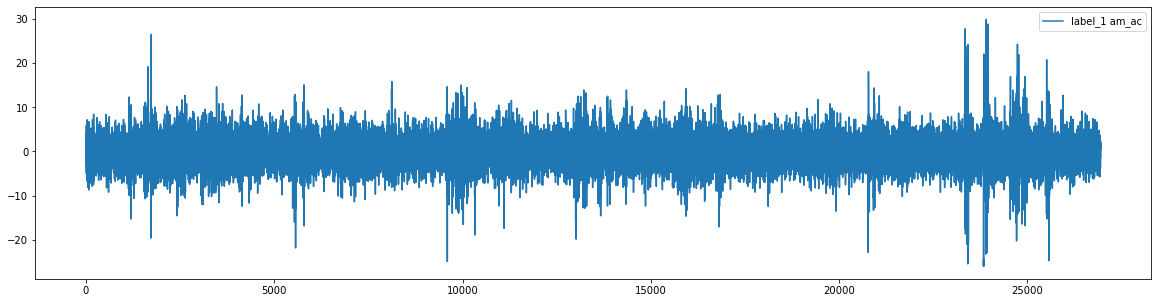

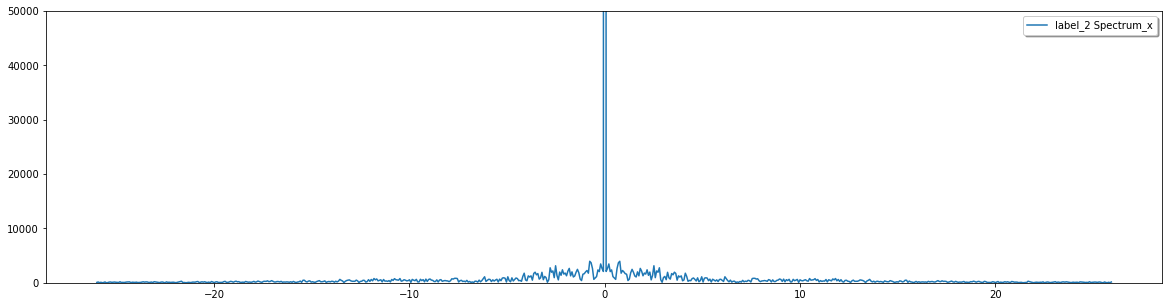

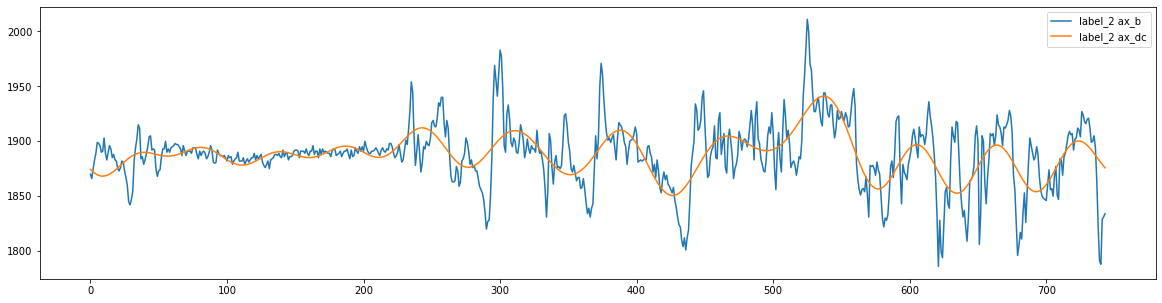

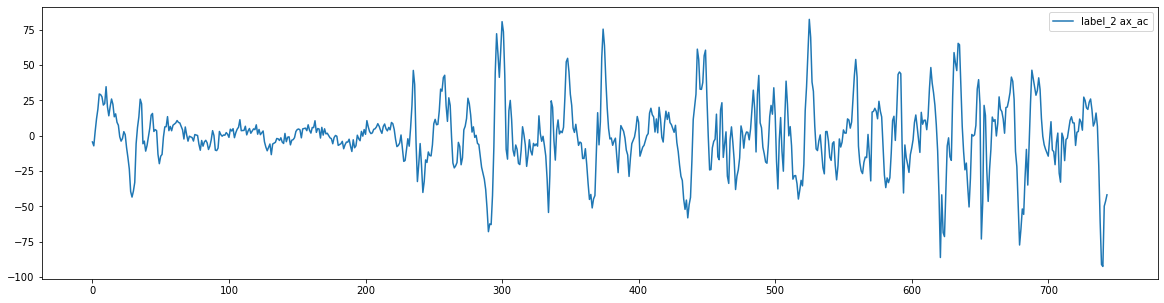

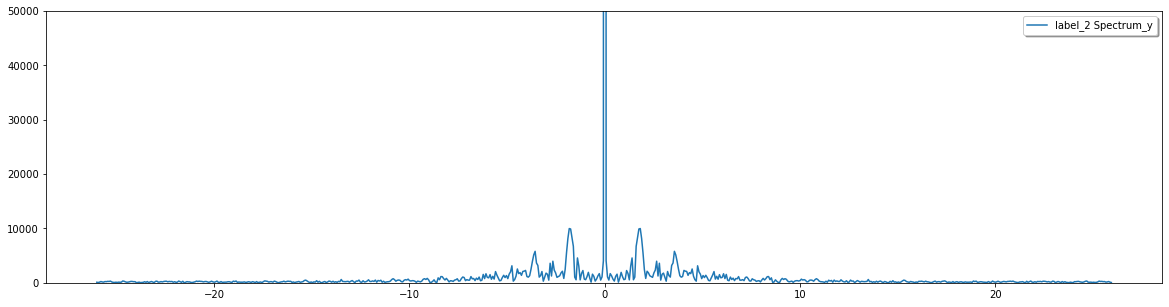

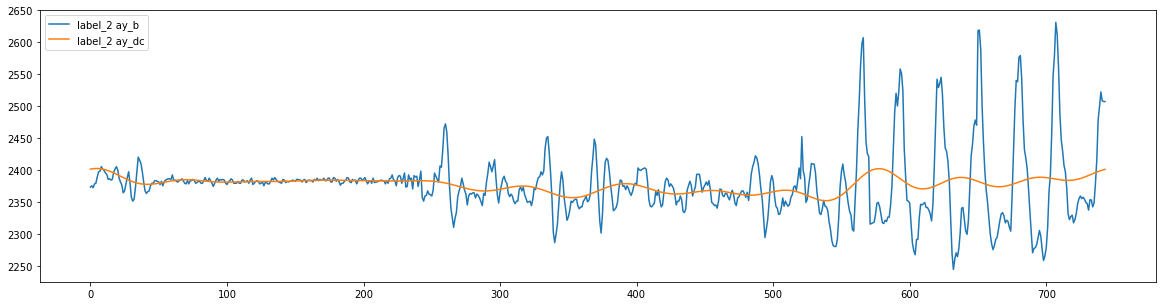

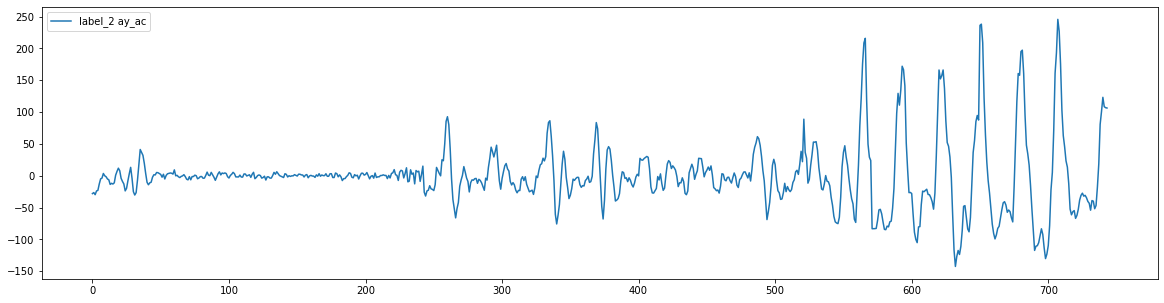

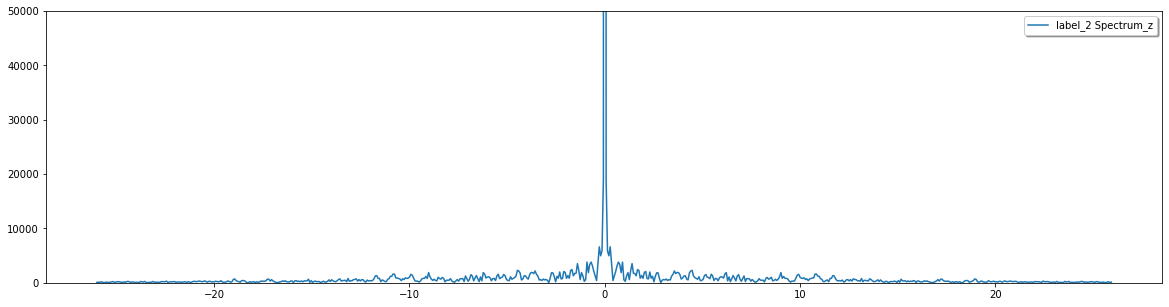

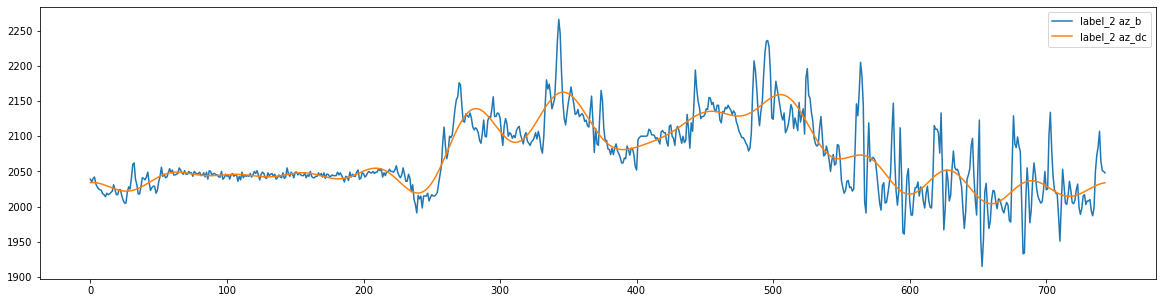

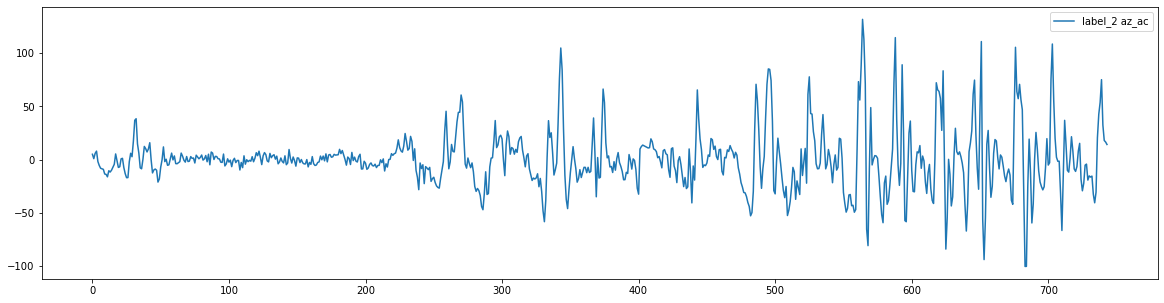

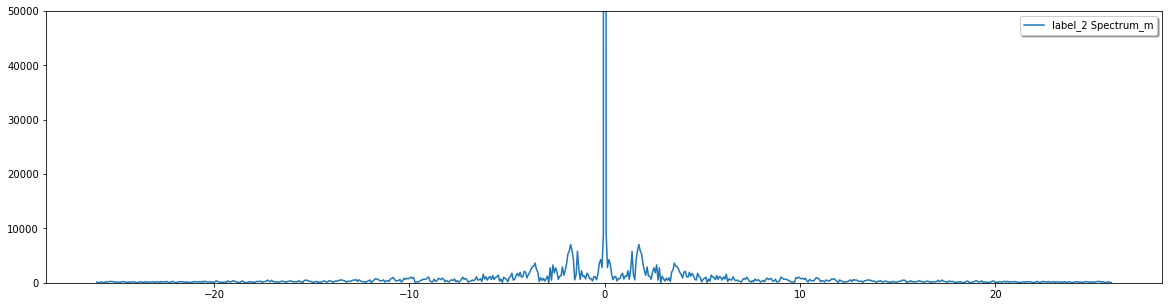

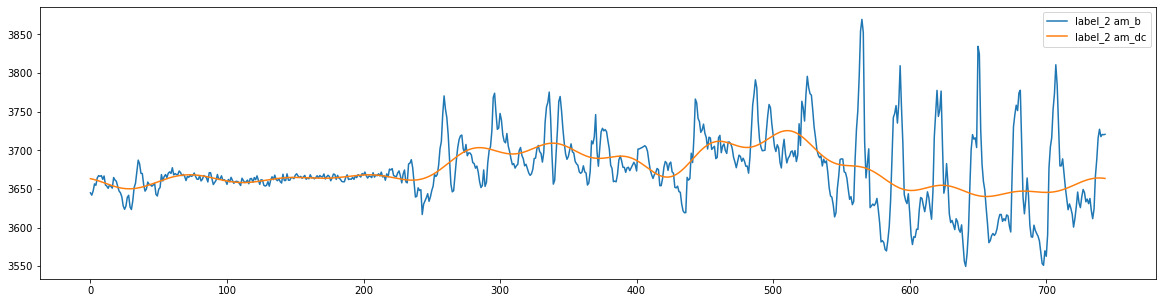

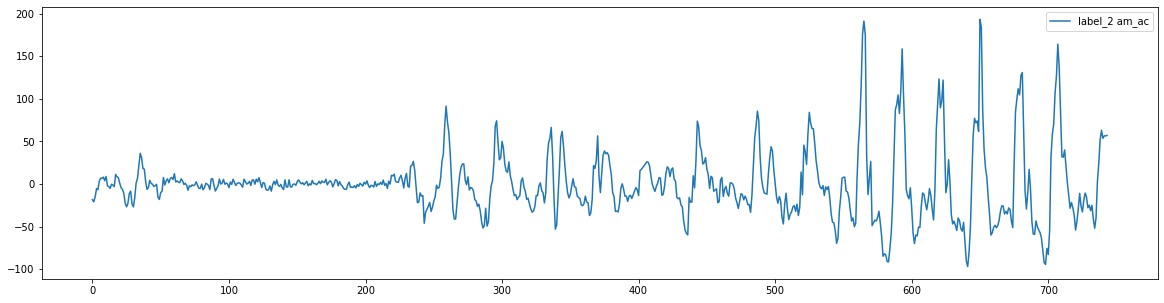

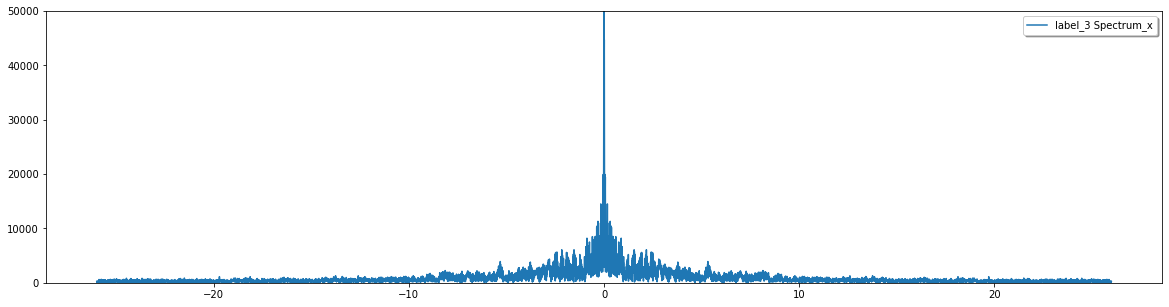

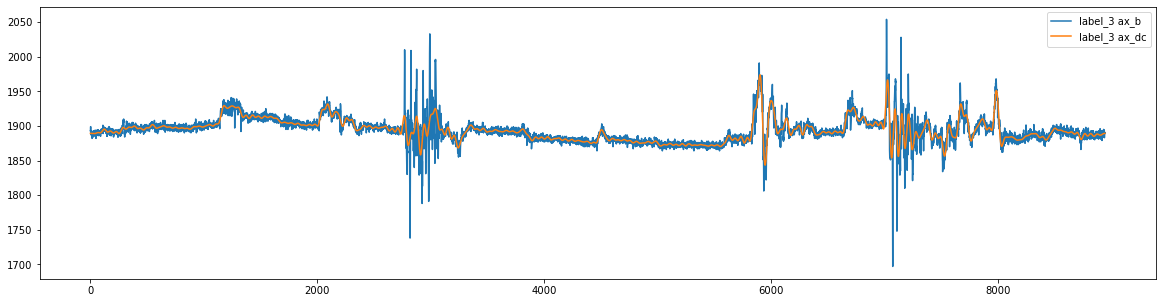

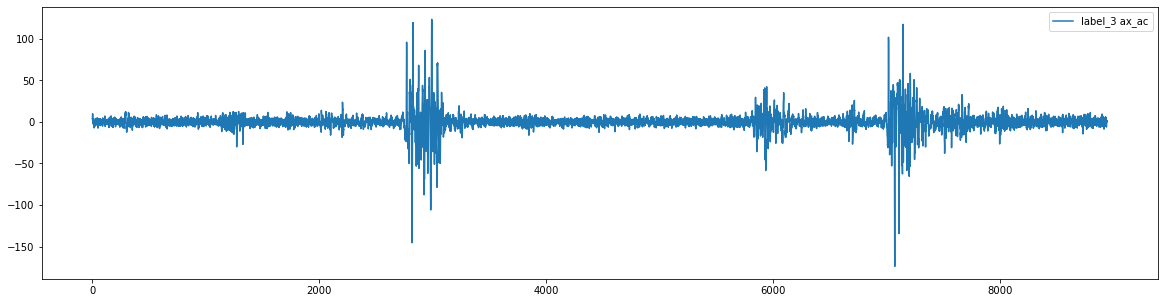

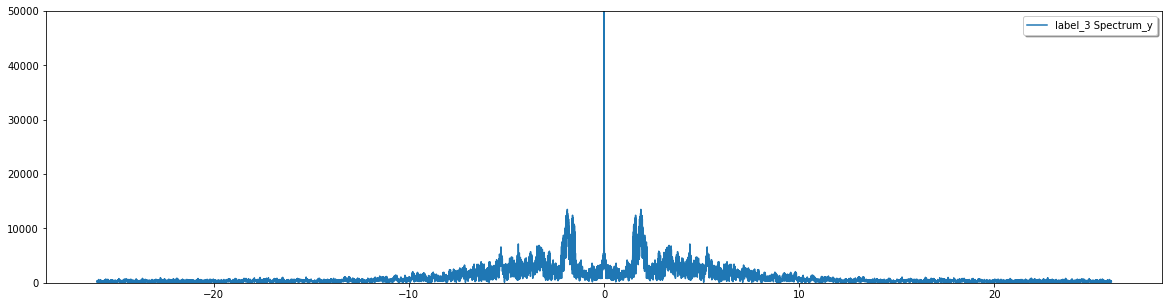

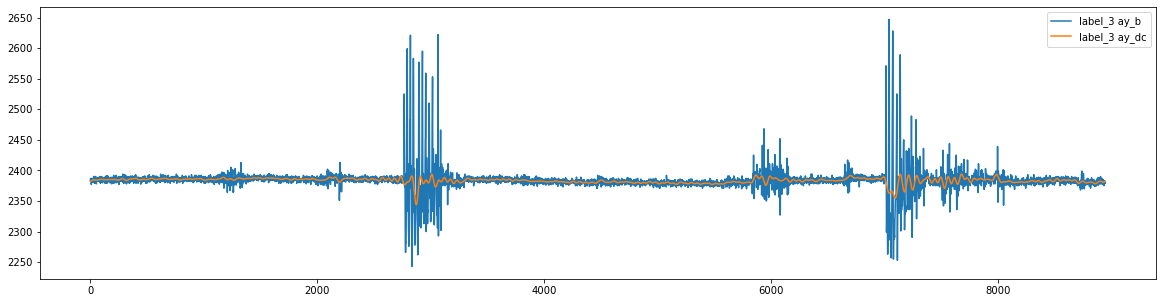

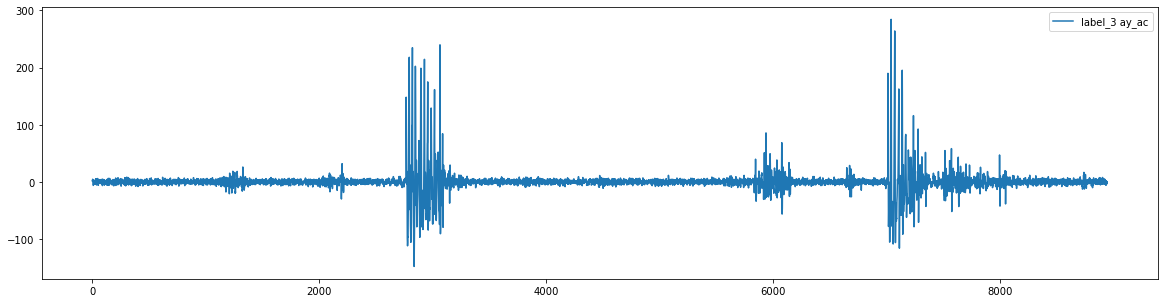

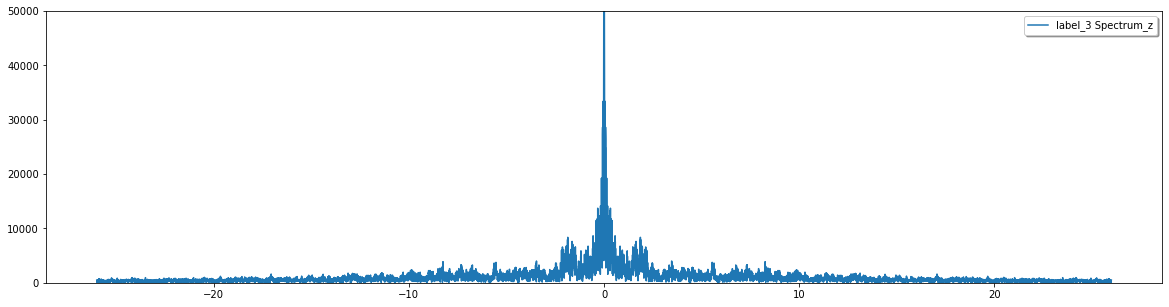

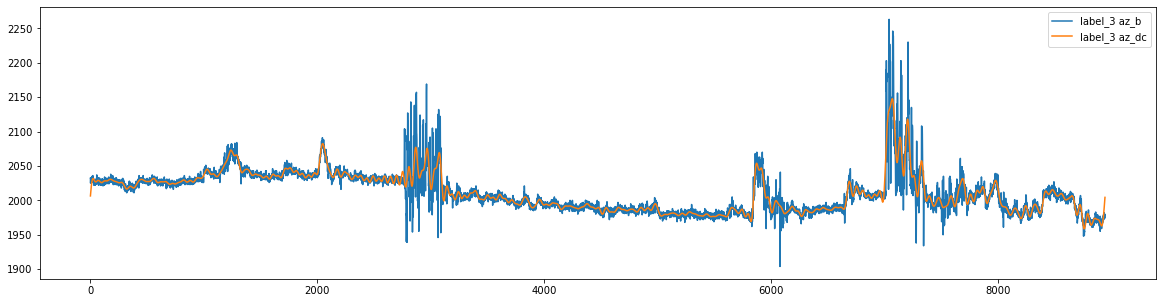

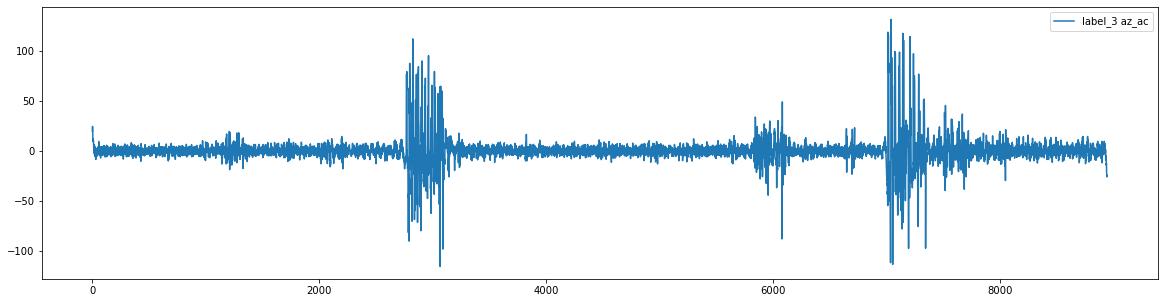

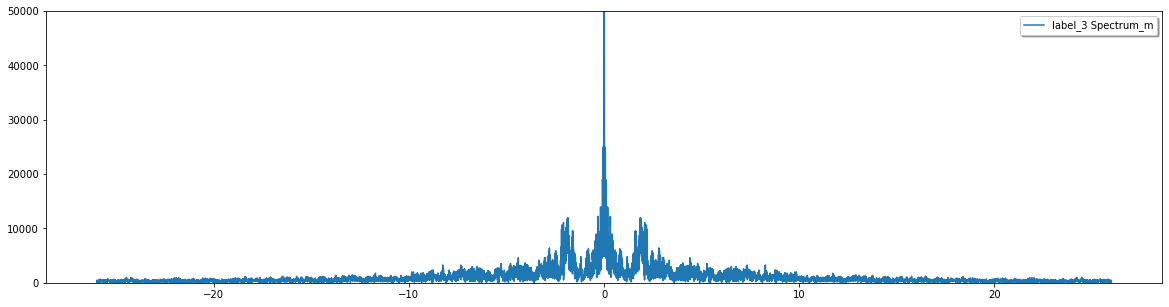

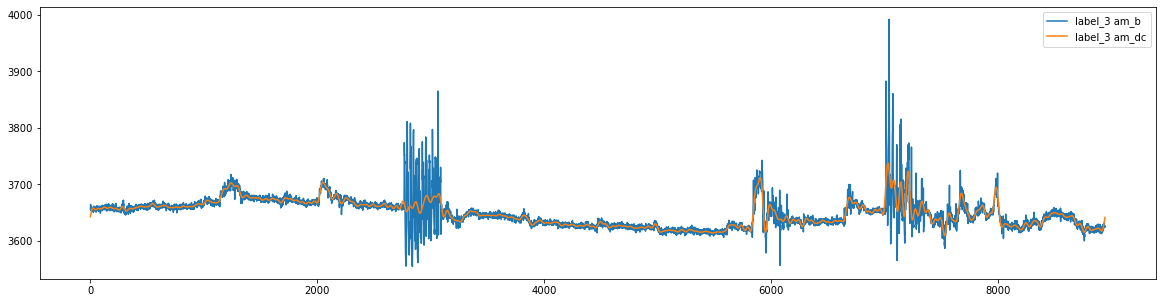

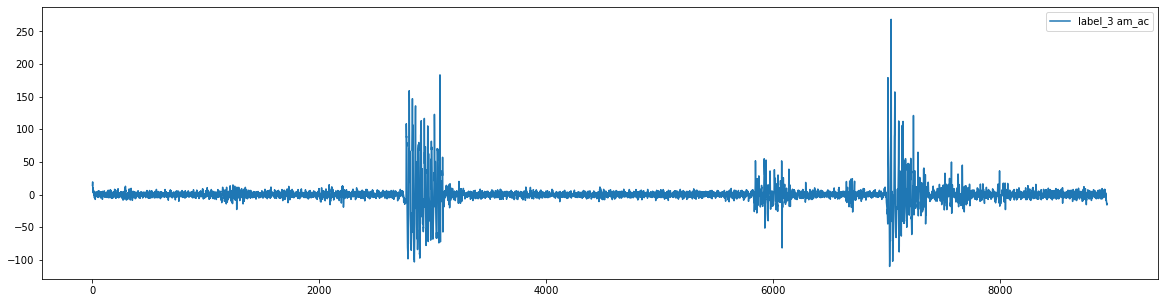

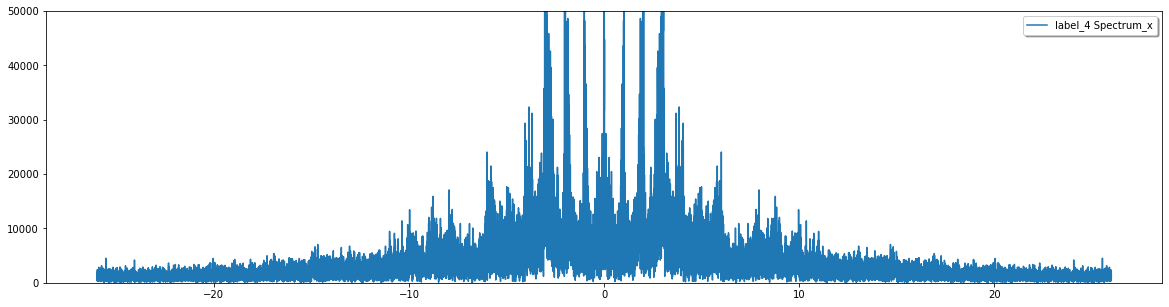

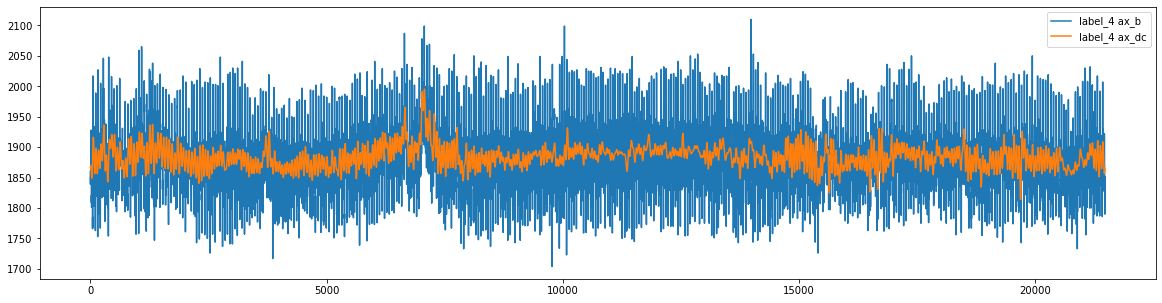

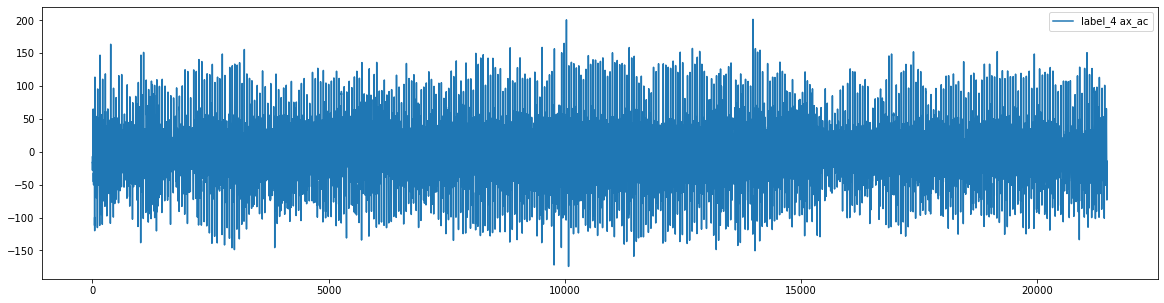

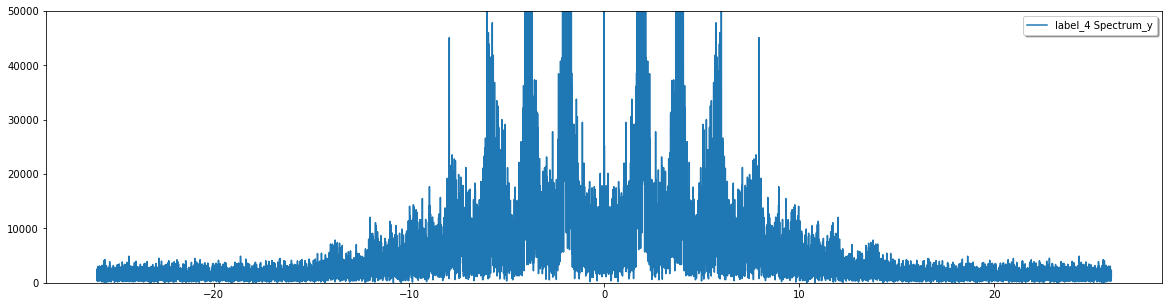

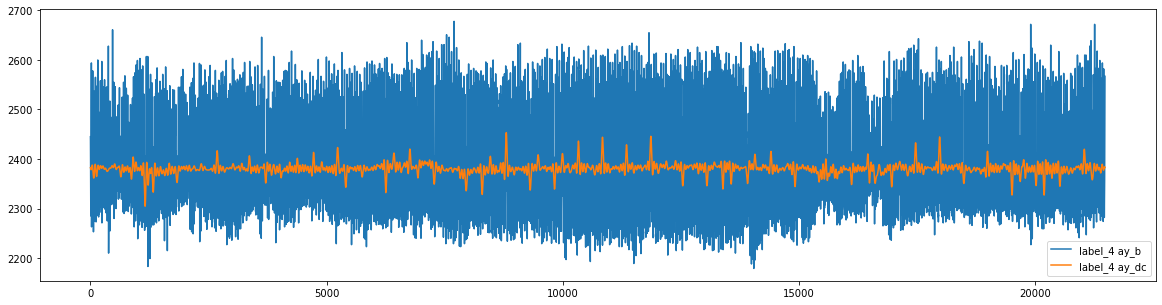

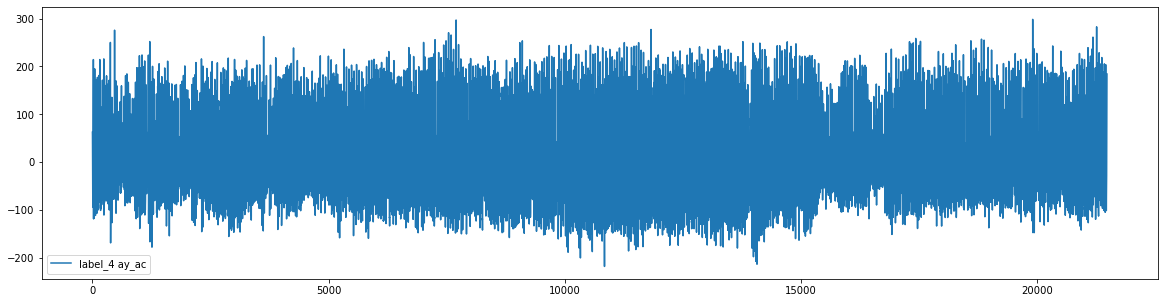

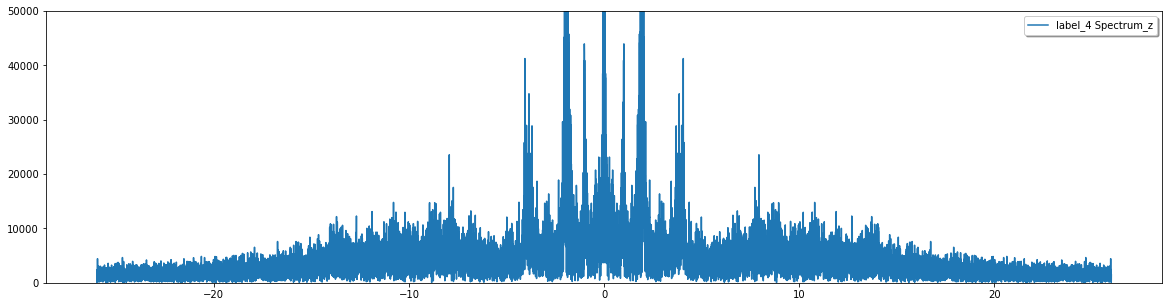

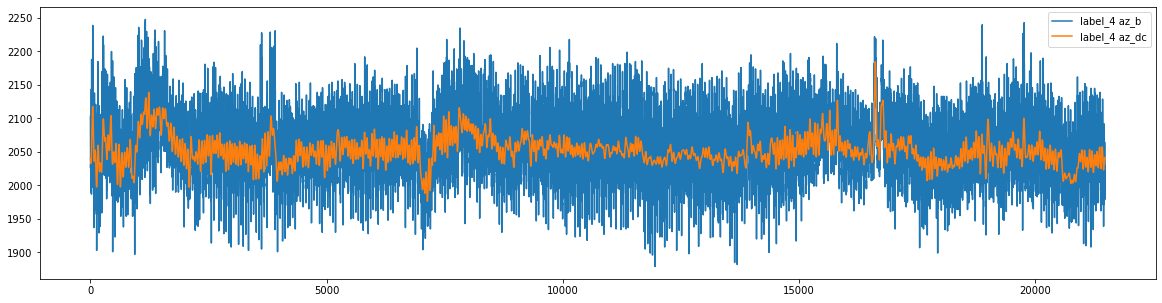

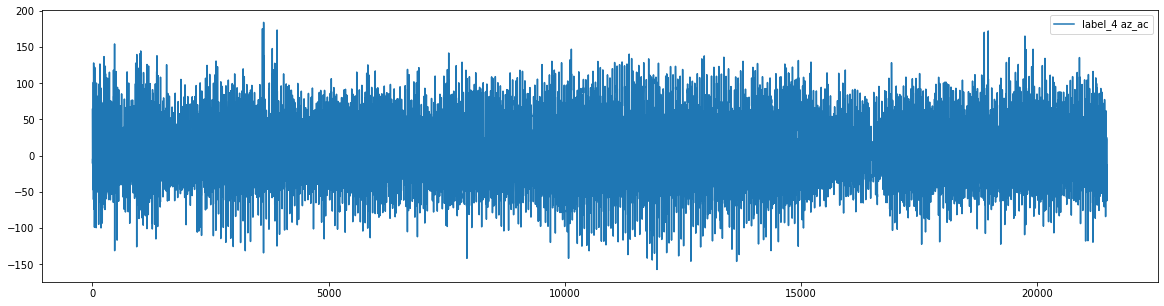

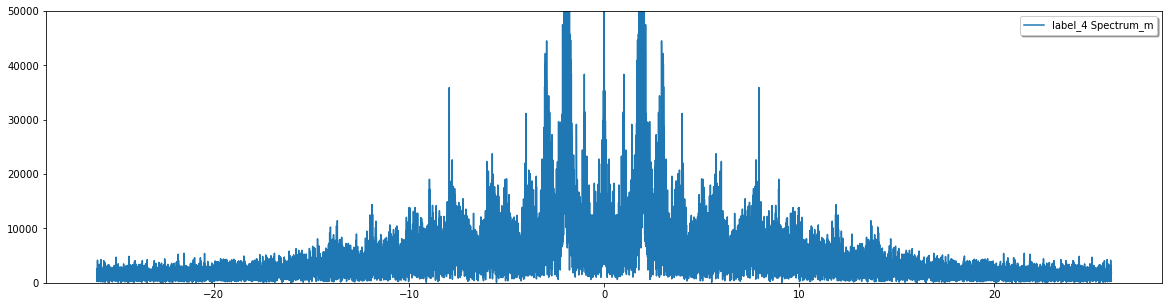

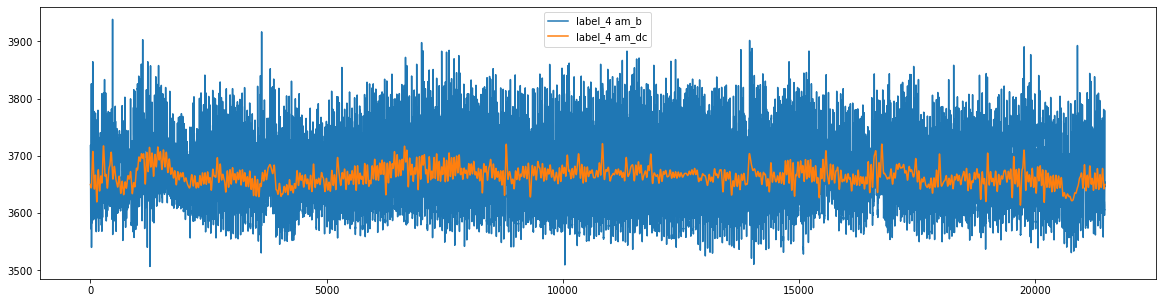

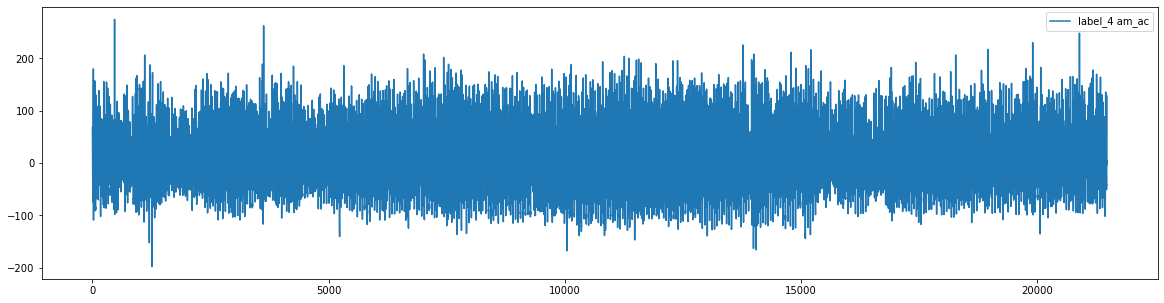

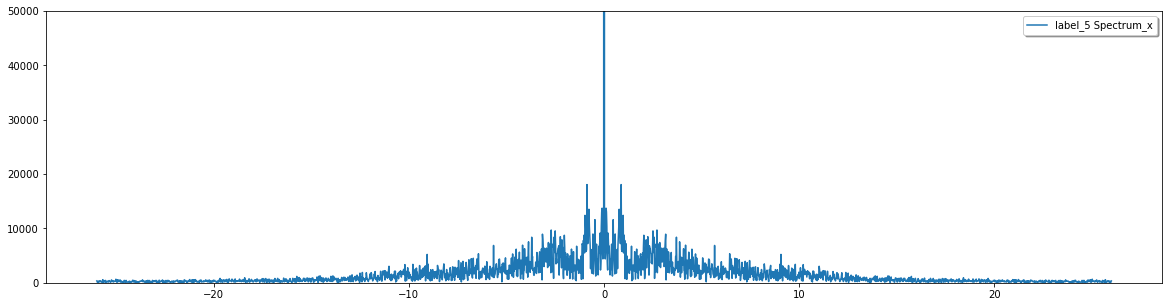

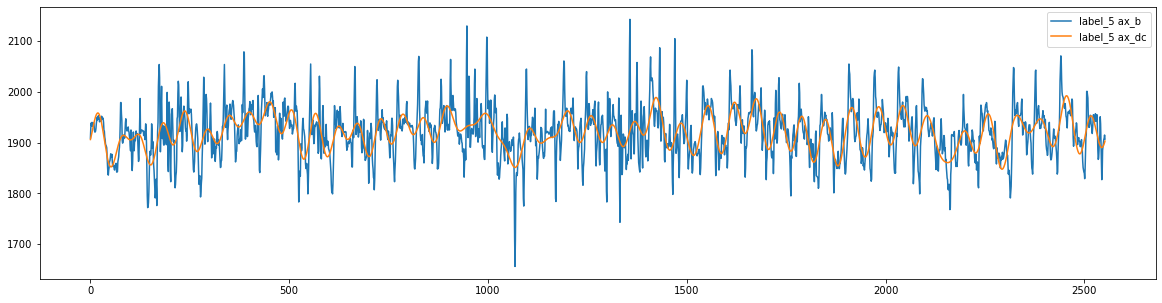

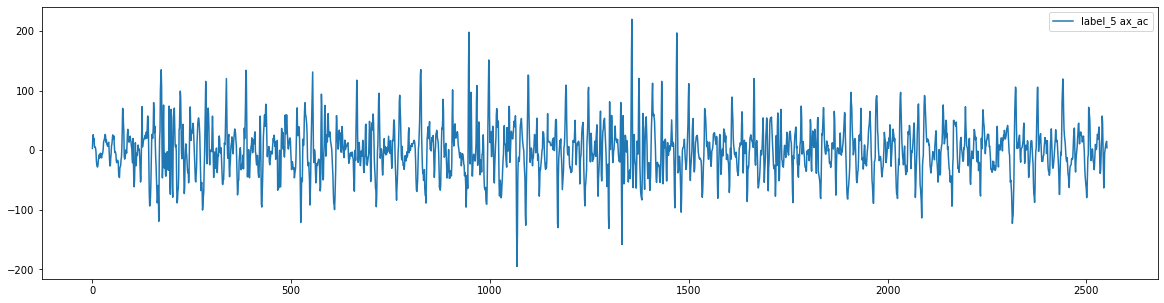

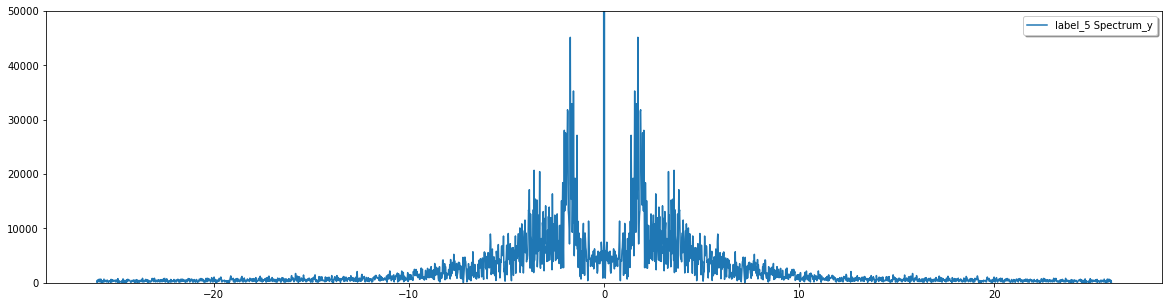

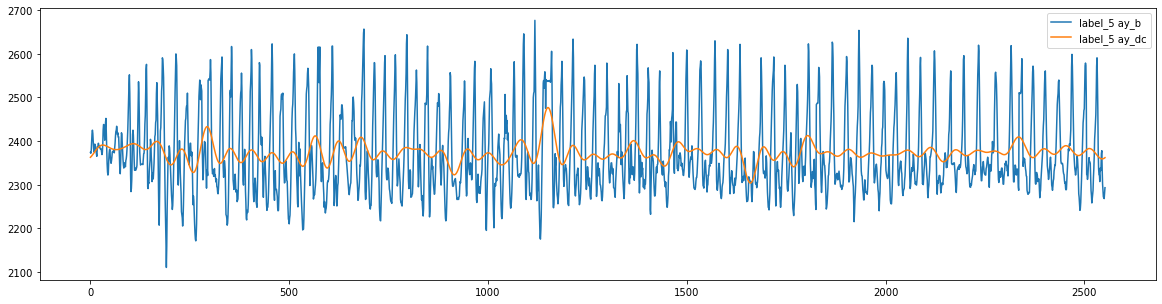

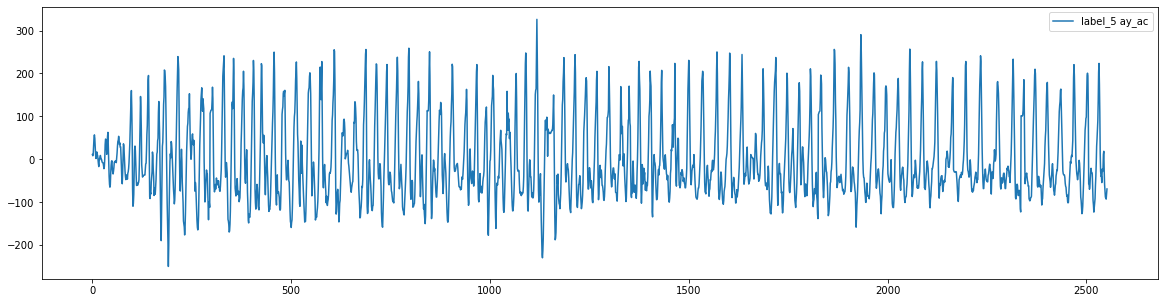

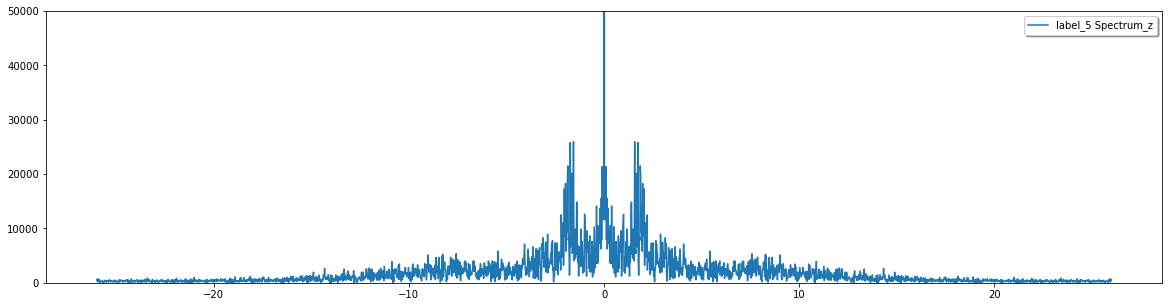

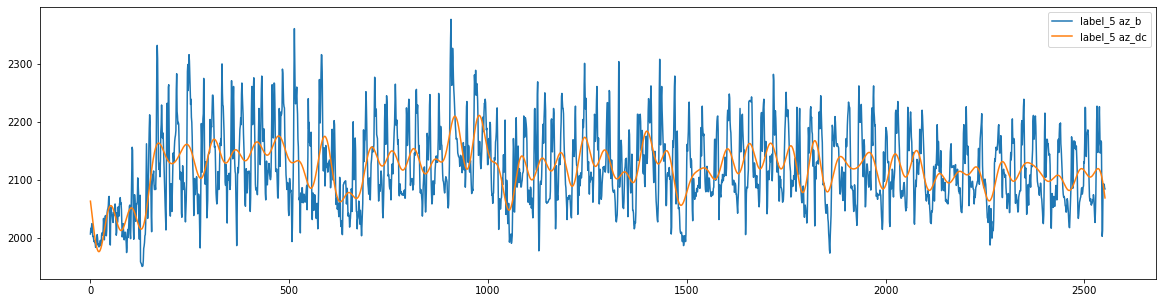

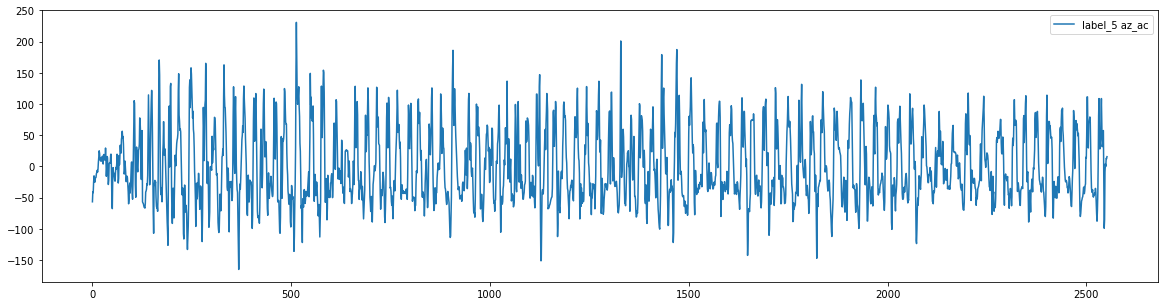

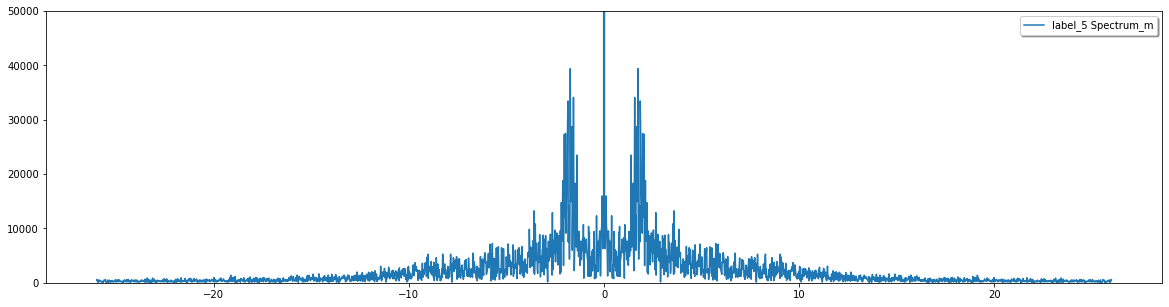

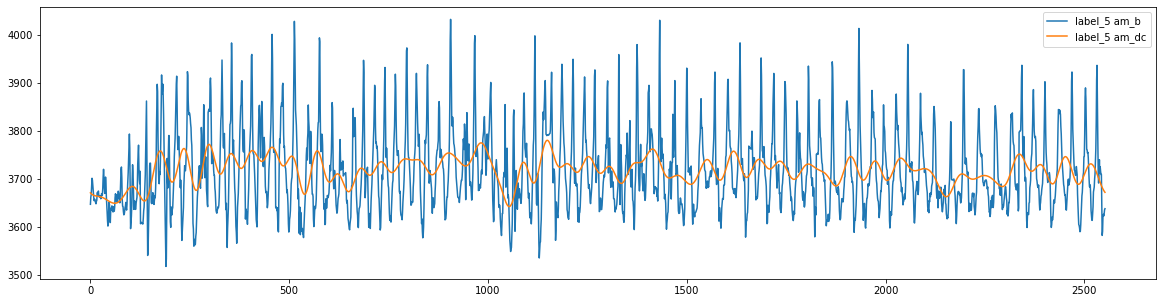

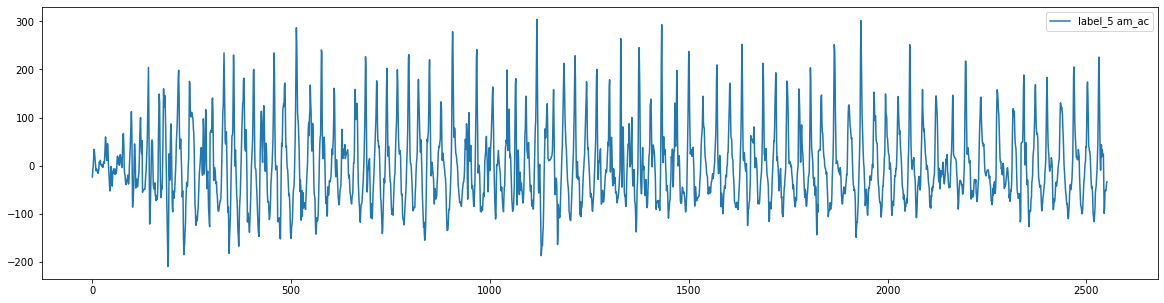

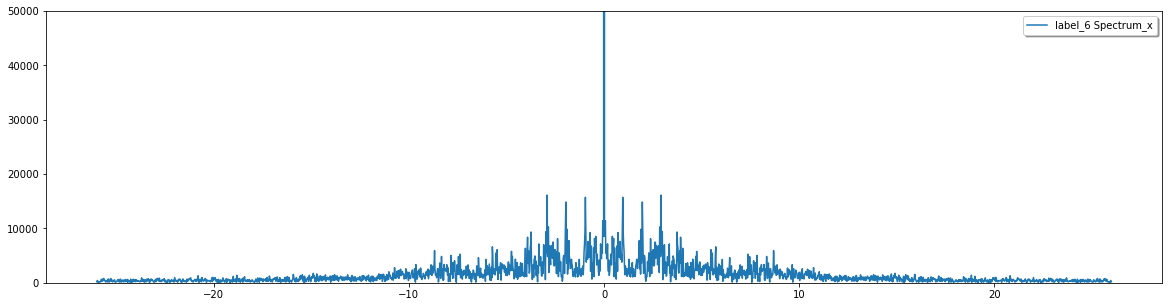

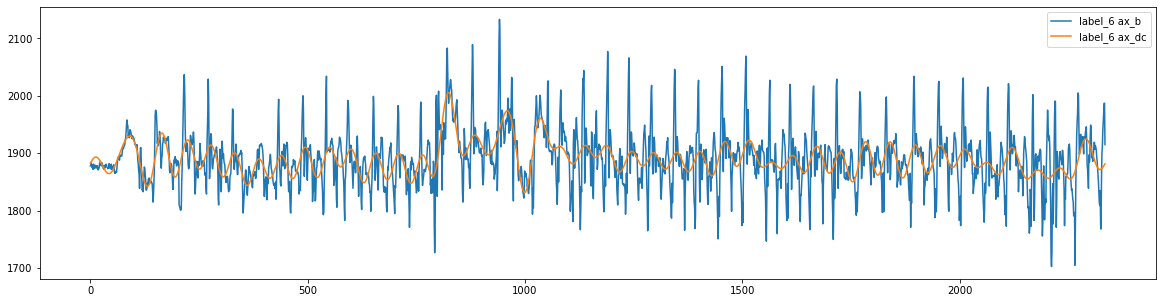

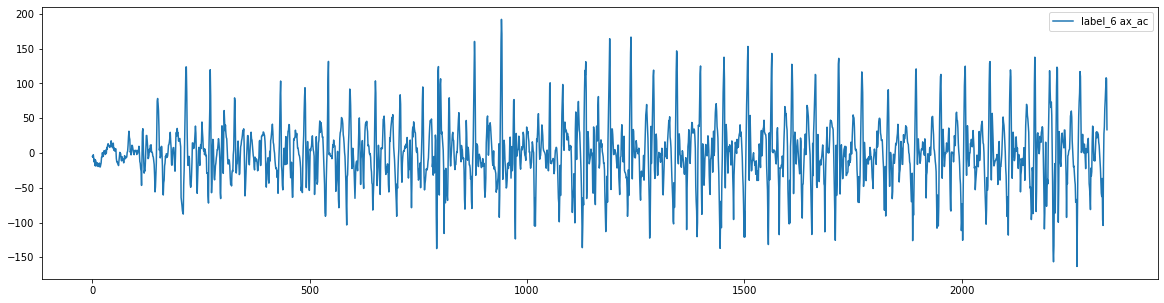

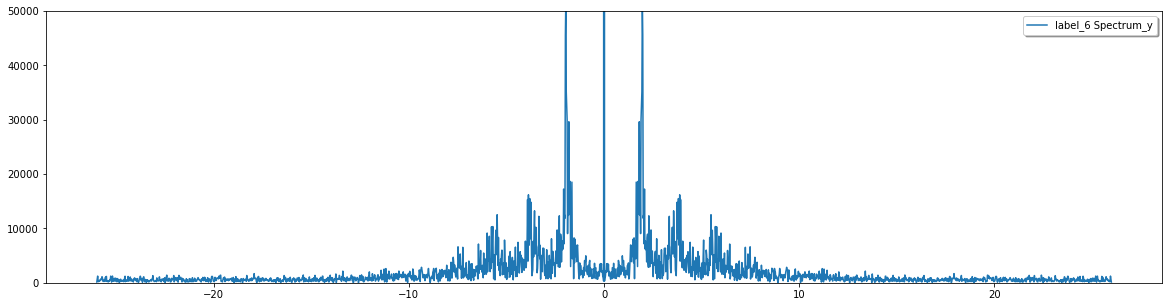

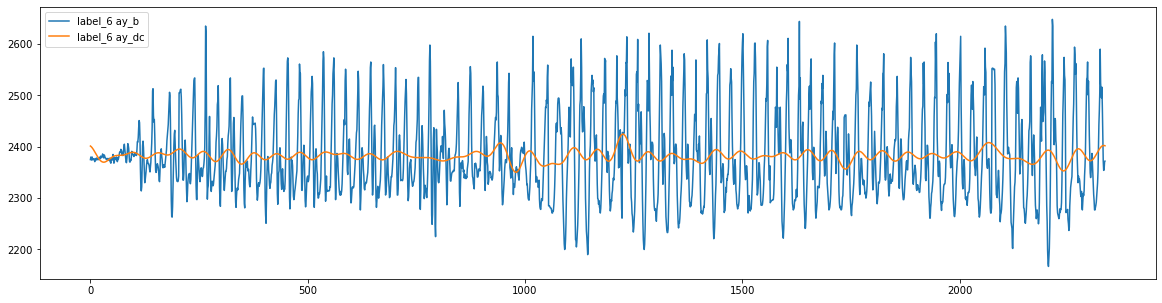

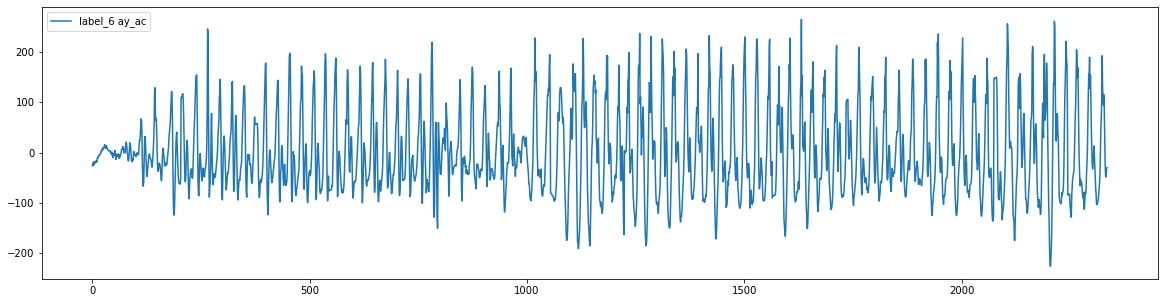

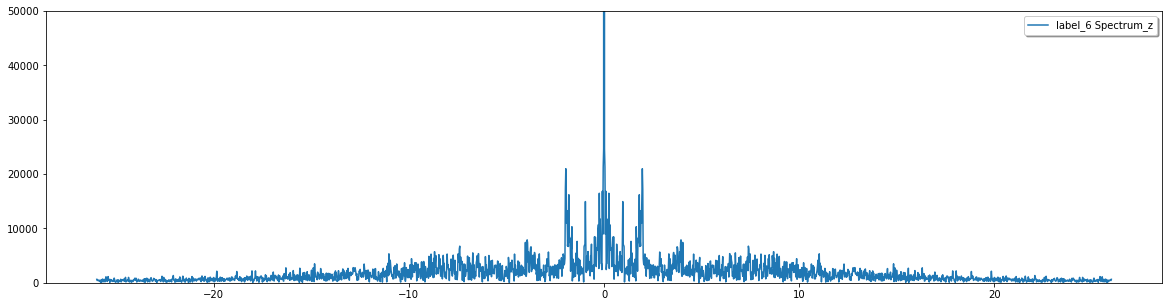

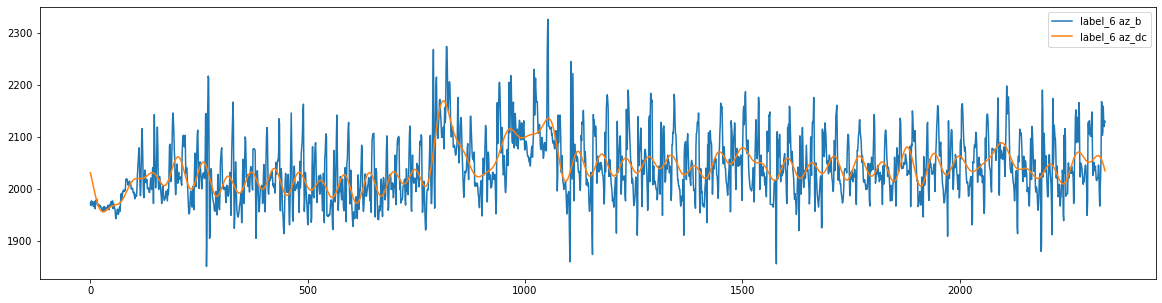

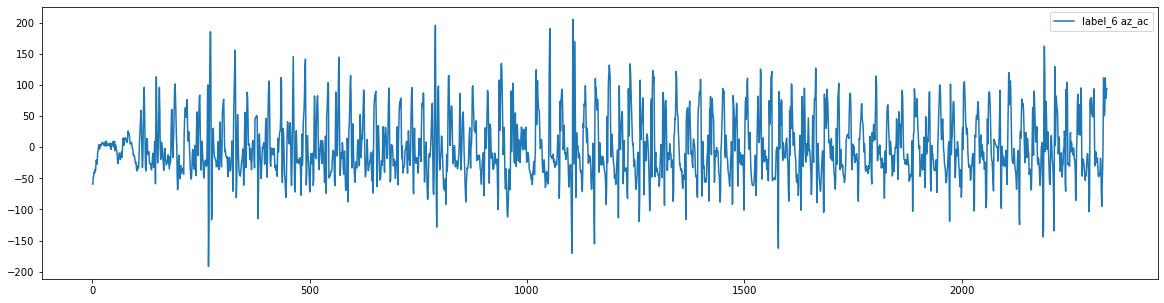

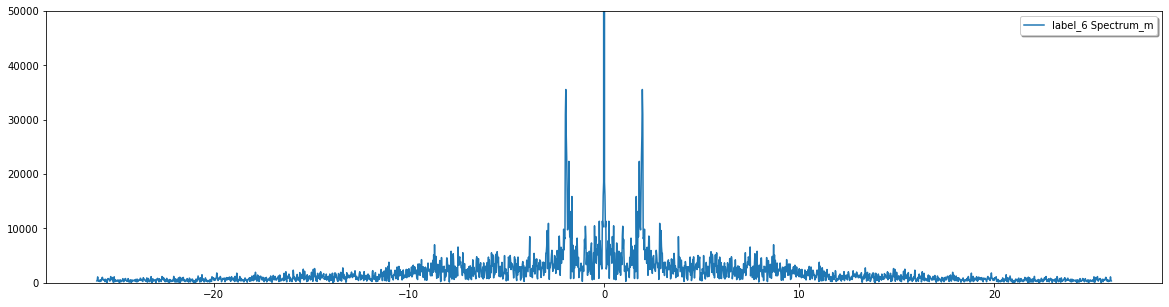

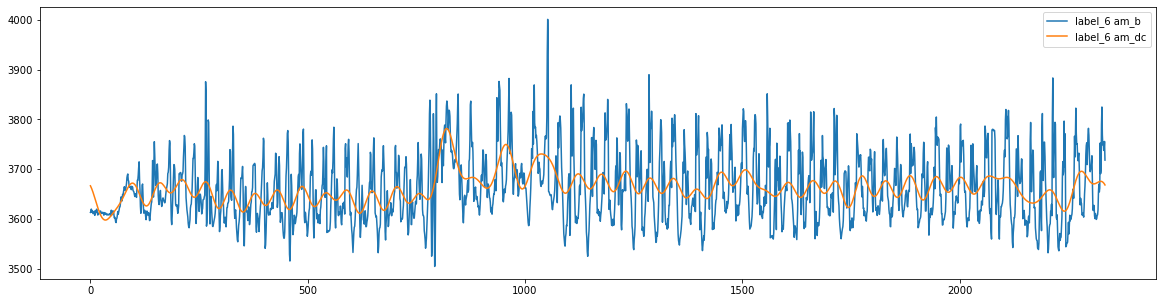

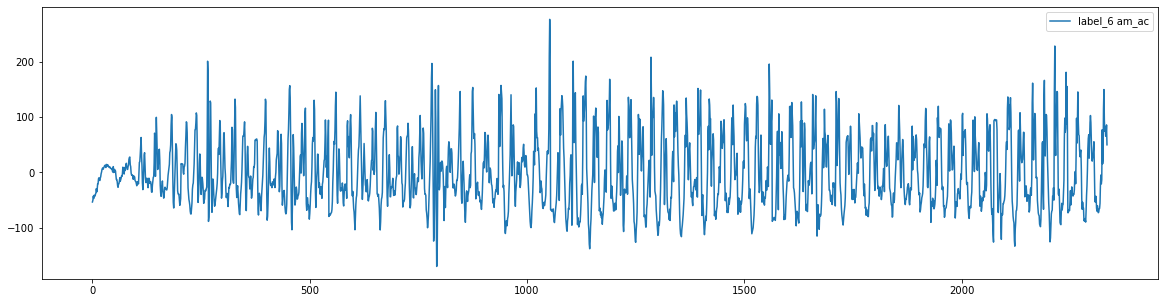

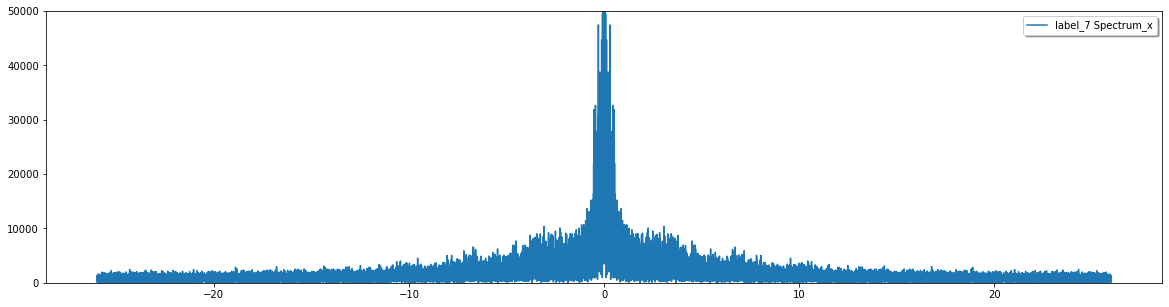

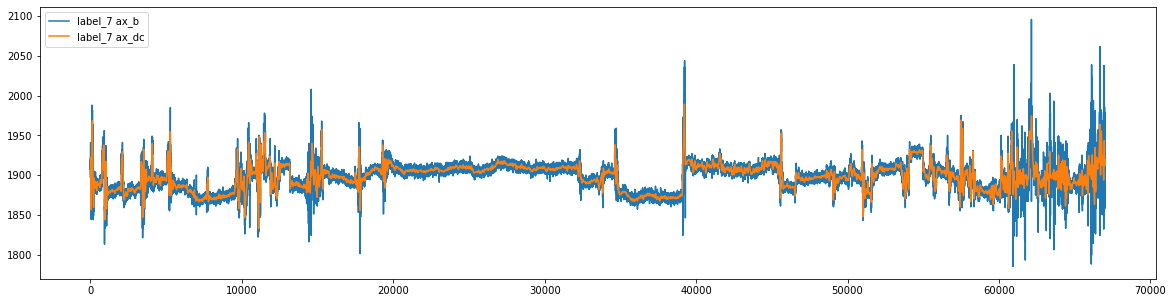

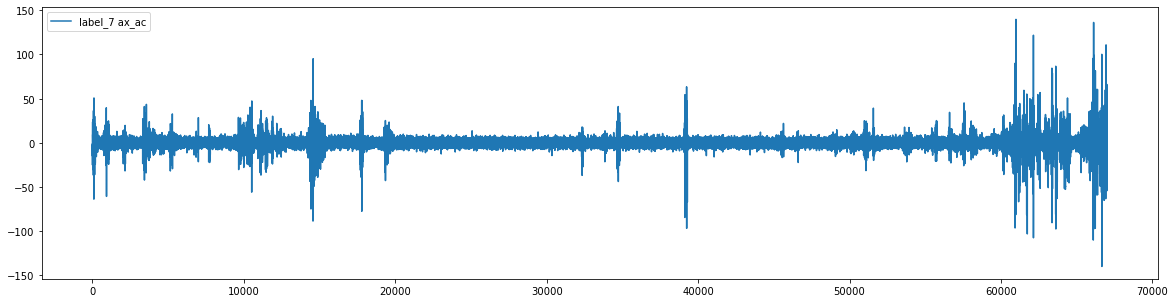

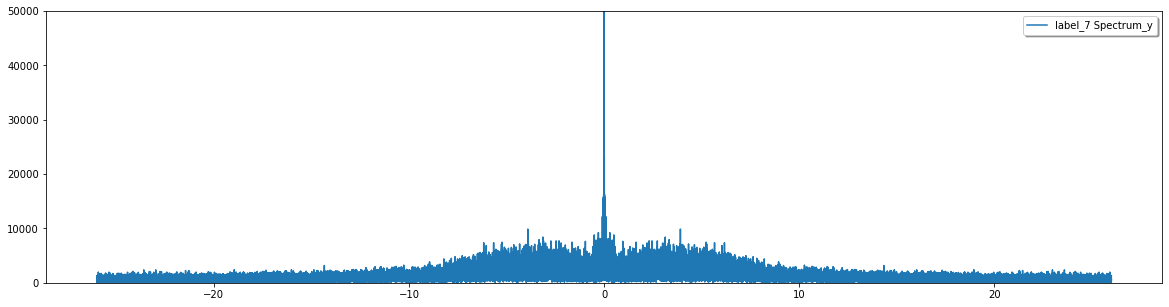

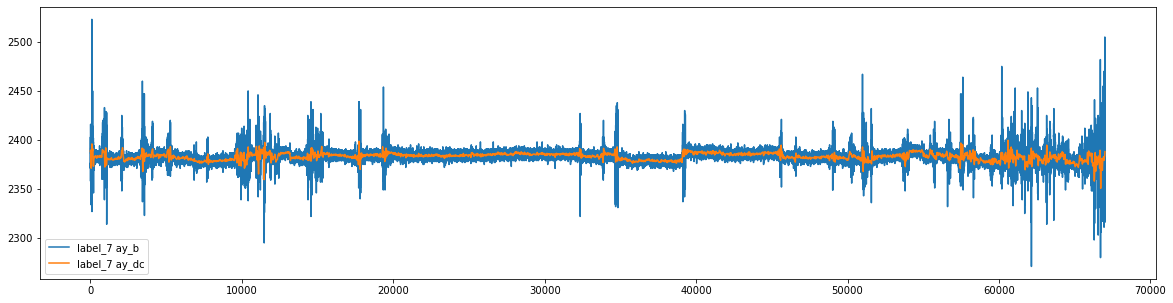

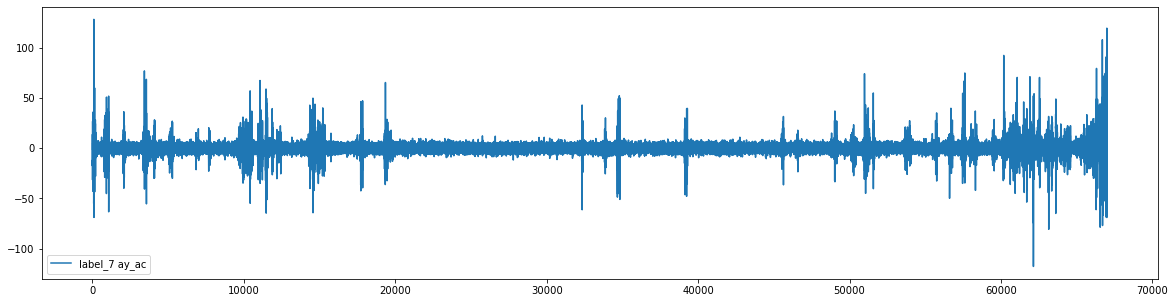

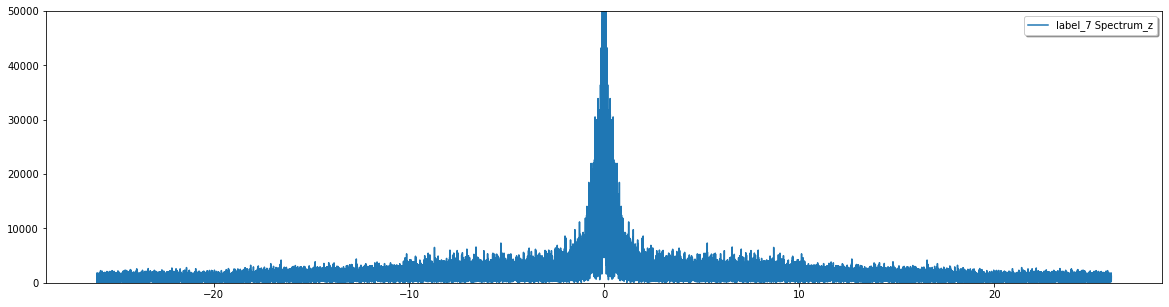

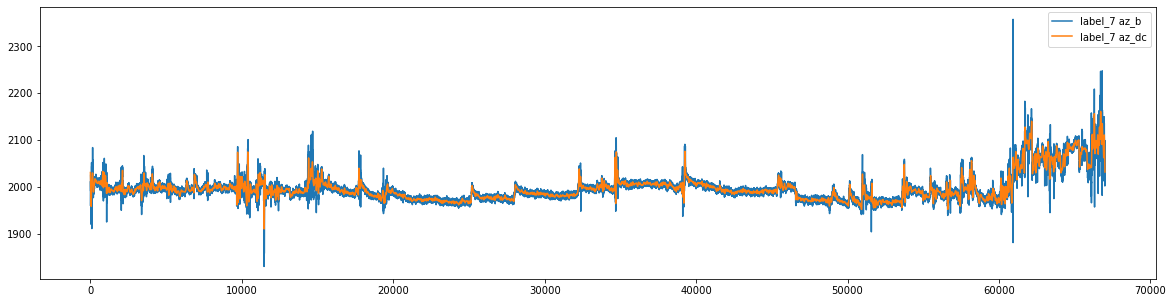

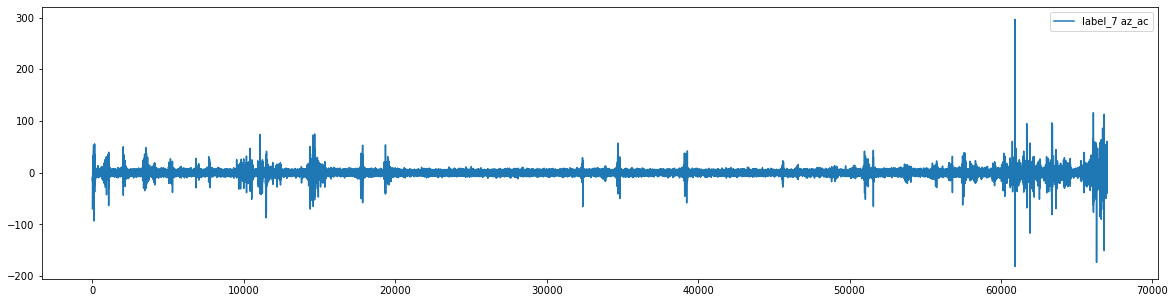

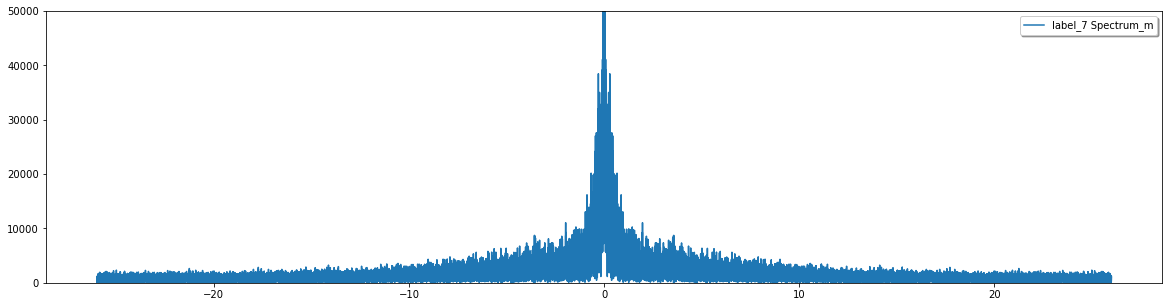

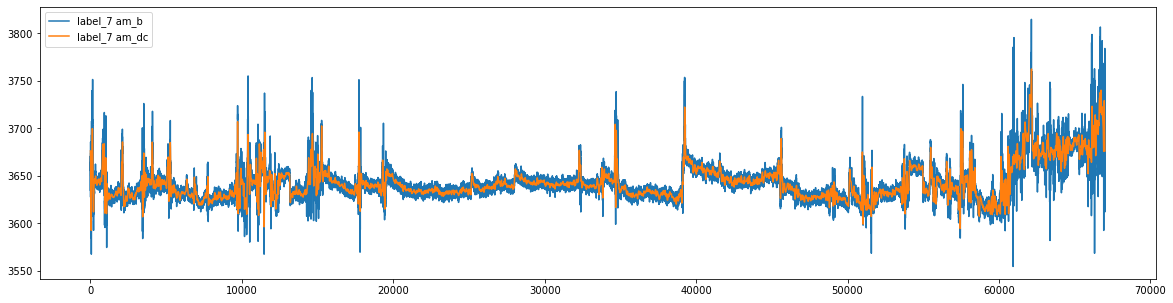

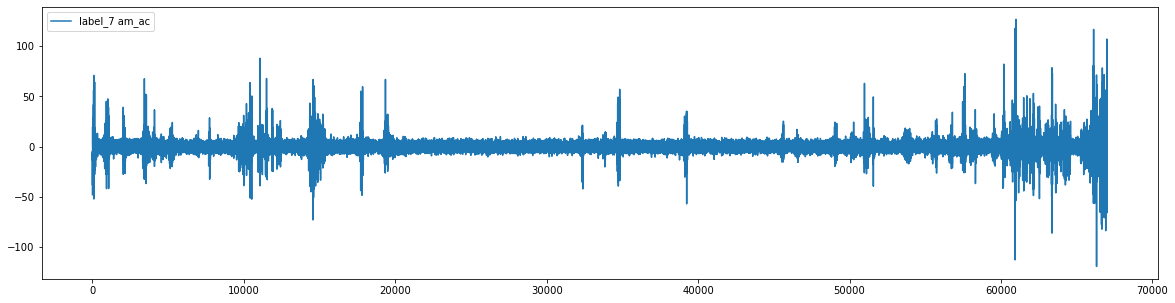

In [3]:
import numpy as np
for i in range(1,8):
    data = df[df["Label"]==i]
    label_list = []
    header = 'ax_b, ax_dc, ax_ac, ay_b, ay_dc, ay_ac, az_b, az_dc, az_ac, am_b, am_dc, am_ac'
    for j in ['x','y','z','m']:
        data_x = data[j]
        n = len(data_x) # cut off 10% from two ends, data_x masih bingung.
        cut_len = int(n*0.1)

        tf = data_x[cut_len:-cut_len]
        tf = np.array(tf,float)
        m = tf.size
        freqY = np.fft.fft(tf)
        spectrum = np.sqrt(freqY.real**2+freqY.imag**2)
        freq = np.fft.fftfreq(m, d=1/52)

        shift_freq = np.fft.fftshift(freq)
        shift_spec = np.fft.fftshift(spectrum)
        
        
        #low Pass
        lowPassMask = abs(freq) <=1 #Cut off 1hz
        lowPassFy = freqY.copy()
        lowPassFy[~lowPassMask] = 0 # ~, equivalent to logical_not
        dc = np.fft.ifft(lowPassFy)

        #High pass filter
        highPassMask = abs(freq) >=1
        highPassFy = freqY.copy()
        highPassFy[lowPassMask] = 0 
        ac = np.fft.ifft(highPassFy)
        
        #Reshape b, dc, ac and append to label list 
        label_list.append(tf.reshape(-1,1))
        label_list.append(dc.real.reshape(-1,1))
        label_list.append(ac.real.reshape(-1,1))
        
        fig,ax2 = plt.subplots(figsize=(20,5))
        ax2.set_ylim(0,50000)
        ax2.plot(shift_freq,shift_spec, label=f"label_{i} Spectrum_{j}")
        ax2.legend(loc = 'best', shadow=True, fontsize = 'medium')
        plt.show()
        
        fig, ax = plt.subplots(figsize=(20,5))
        #ax.figure(figsize=(20,10))
        ax.plot(tf,label = f"label_{i} a{j}_b")
        ax.plot(dc.real,label = f'label_{i} a{j}_dc')
        ax.legend()
        plt.show()
        fig,ax1 = plt.subplots(figsize=(20,5))
        ax1.plot(ac.real,label = f"label_{i} a{j}_ac")
        plt.legend()
        plt.show()
        
        arrange_table = np.hstack(label_list)
        np.savetxt(r'D:\Goki Purba\S2\AI and Big Data\Tugas\6\Goki\label_{}.csv'.format(i), arrange_table, delimiter=',', fmt='%18f',header=header, comments='')